In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# Оценка годовой стоимости недвижимости, проданной на рынке недвижимости     Нью-Йорка

Предположим, риэлтор в целях улучшения качества своей работы хочет узнать информацию о проданной за последнее время в Нью-Йорке недвижиомсти. О её территориальном распределении в частности. Загрузим данные о проданных объектах недвижимости Нью-Йорке за год.

# 1.Загружаем данные

In [3]:
url = "https://raw.githubusercontent.com/LakshinaAlexandra/MachineLearning/master/NYC_Property_Sales.csv"
data = pd.read_csv(url)

In [4]:
# Сразу удалим стоблец "Unnamed: 0", не инрающий в дальнейшем никакой роли
data.drop(['Unnamed: 0'], axis='columns', inplace=True)

Таблица содержит данные о более 84500 зданий или строительных единиц (квартиры и т.д.), проданных на рынке недвижимости Нью-Йорка за 12-месячный период.

Для объектов указаны их информация о расположении, класс строения, адрес, почтовый индекс, площадь, год постройки, налоговый класс, цена и дата при продаже и т.д.

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной одному объекту недвижимости) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [5]:
data.shape

(84548, 21)

Метод data.head() отображает первые строки (по умолчанию, 5 строк) таблицы

In [6]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Так же можно вывести последние строки (по умолчанию, 5 строк) таблицы

In [7]:
data.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Имена столбцов (признаков) можно получить таким образом:

In [8]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

Мы видим, что столбцы (признаки) имеют имена

- BOROUGH - цифровой код района, в котором находится недвижимость  
  Это будут наши 5 классов данных, с которыми мы будем работать:  

   - 1 - Манхэттен  
   - 2 - Бронкс  
   - 3 - Бруклин  
   - 4 - Куинс   
   - 5 - Статен-Айленд
   
- NEIGHBORHOOD - соседний район
- BUILDING CLASS CATEGORY - класс строения
- TAX CLASS AT PRESENT - налоговый класс в настоящий момент
- BLOCK - квартал
- LOT - участок
(Комбинация BOROUGH, BLOCK и LOT является уникальным ключом к собственности в Нью-Йорке. Обычно называется BBL)
- EASE-MENT - сервитут - право ограниченного пользования чужим земельным участком, зданием, сооружением и другим недвижимым имуществом
- BUILDING CLASS AT PRESENT - класс здания на настоящее время
- ADDRESS - адрес недвижимости
- APARTMENT NUMBER - номер квартиры
- ZIP CODE - почтовый индекс
- RESIDENTIAL UNITS - жилых единиц в объекте недвижимости
- COMMERCIAL UNITS - коммерческих единиц в объекте недвижимости
- TOTAL UNITS - всего единиц в объекте недвижимости
- LAND SQUARE FEET - площадь земли в кв.футах
- GROSS SQUARE FEET - валовая площадь в кв.футах
- YEAR BUILT - год постройки
- TAX CLASS AT TIME OF SALE - налоговый класс на момент продажи
- BUILDING CLASS AT TIME OF SALE - класс здания на момент продажи
- SALE PRICE - цена недвижимости при продаже
- SALE DATE - дажа продажи

Признаки: BOROUGH, ZIP CODE  - категориальные, представлены в числовом виде  
Признаки: TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT, APARTMENT NUMBER, TAX CLASS AT TIME OF SALE, BUILDING CLASS AT TIME OF SALE, - категориальные, представлены в виде числа или числа+буквы  
Признаки: NEIGHBORHOOD, BUILDING CLASS CATEGORY, ADDRESS, SALE DATE, EASE-MENT - категориальные  
Признаки: BLOCK, LOT, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, EAR BUILT, SALE PRICE - числовые

Требуется предсказать категориальный признак BOROUGH, представленный в числовом виде (номер кода района) по остальным признакам. Это задача классификации.

Имена строк (совпадают с номерами)

In [9]:
data.index

RangeIndex(start=0, stop=84548, step=1)

In [10]:
data.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

Столбцы 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE' и 'SALE DATE' содержат категориальные значения. Пока имеют тип 'Object'. Приведём их к специальному типу, предназначенному для хранения категориальных значений.

Столбцы 'LAND SQUARE FEET', 'GROSS SQUARE FEET' и 'SALE PRICE' содержат числовые значения, но тоже имеют тип 'Object'. Приведём их к типу float64.

In [11]:
data['NEIGHBORHOOD'] = data['NEIGHBORHOOD'].astype('category');

In [12]:
data['BUILDING CLASS CATEGORY'] = data['BUILDING CLASS CATEGORY'].astype('category');

In [13]:
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category');

In [14]:
data['EASE-MENT'] = data['EASE-MENT'].astype('category');

In [15]:
data['BUILDING CLASS AT PRESENT'] = data['BUILDING CLASS AT PRESENT'].astype('category');

In [16]:
data['ADDRESS'] = data['ADDRESS'].astype('category');

In [17]:
data['APARTMENT NUMBER'] = data['APARTMENT NUMBER'].astype('category');

In [18]:
data['BUILDING CLASS AT TIME OF SALE'] = data['BUILDING CLASS AT TIME OF SALE'].astype('category');

In [19]:
data['SALE DATE'] = data['SALE DATE'].astype('category');

In [20]:
# в столбце числа и дефисы. Переводим в числа и NaN
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')

In [21]:
# в столбце числа и дефисы. Переводим в числа и NaN
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')

In [22]:
# в столбце числа и дефисы. Переводим в числа и NaN
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')

In [23]:
data.dtypes

BOROUGH                              int64
NEIGHBORHOOD                      category
BUILDING CLASS CATEGORY           category
TAX CLASS AT PRESENT              category
BLOCK                                int64
LOT                                  int64
EASE-MENT                         category
BUILDING CLASS AT PRESENT         category
ADDRESS                           category
APARTMENT NUMBER                  category
ZIP CODE                             int64
RESIDENTIAL UNITS                    int64
COMMERCIAL UNITS                     int64
TOTAL UNITS                          int64
LAND SQUARE FEET                   float64
GROSS SQUARE FEET                  float64
YEAR BUILT                           int64
TAX CLASS AT TIME OF SALE            int64
BUILDING CLASS AT TIME OF SALE    category
SALE PRICE                         float64
SALE DATE                         category
dtype: object

### Доступ к отдельным элементам и выделение подтаблиц (slice)

In [24]:
data.at [4, 'BUILDING CLASS AT PRESENT']

'C2'

In [25]:
data.iat [4,8]

'301 EAST 10TH   STREET'

In [26]:
data['BUILDING CLASS AT PRESENT']

0        C2
1        C7
2        C7
3        C4
4        C2
5        C4
6        C4
7        C7
8        D5
9        D9
10       D7
11       D1
12       C6
13       C6
14       C6
15       C6
16       C6
17       C6
18       C6
19       C6
20       C6
21       C6
22       C6
23       C6
24       C6
25       C6
26       C6
27       C6
28       C6
29       C6
         ..
84518    B2
84519    B2
84520    B2
84521    B2
84522    B2
84523    B9
84524    B9
84525    B9
84526    B9
84527    B9
84528    B9
84529    B9
84530    B2
84531    B9
84532    B9
84533    B2
84534    B9
84535    B2
84536    B2
84537    B2
84538    B2
84539    B2
84540    B2
84541    B2
84542    B9
84543    B9
84544    B9
84545    B2
84546    K6
84547    P9
Name: BUILDING CLASS AT PRESENT, Length: 84548, dtype: category
Categories (167, object): [, A0, A1, A2, ..., Z2, Z3, Z7, Z9]

In [27]:
data['BUILDING CLASS AT PRESENT'][1]

'C7'

In [28]:
data['BLOCK'].dtype.name

'int64'

In [29]:
type(data['BUILDING CLASS AT PRESENT'][3])

str

In [30]:
type(data['BUILDING CLASS AT PRESENT'])

pandas.core.series.Series

In [31]:
data[['BLOCK','ZIP CODE', 'SALE PRICE']].head()

,BLOCK,ZIP CODE,SALE PRICE
0,392,10009,6625000.0
1,399,10009,NaN
2,399,10009,NaN
3,402,10009,3936272.0
4,404,10009,8000000.0


In [32]:
data.iloc[[2,3,5], [4,6,7]]

,BLOCK,EASE-MENT,BUILDING CLASS AT PRESENT
2,399,,C7
3,402,,C4
5,405,,C4


In [33]:
data.loc[[4, 8], :]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,...,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20 00:00:00


In [34]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


### Доступ по булевой маске

In [35]:
df = data.iloc[:4, 3:6]
df

,TAX CLASS AT PRESENT,BLOCK,LOT
0,2A,392,6
1,2,399,26
2,2,399,39
3,2B,402,21


In [36]:
df.loc[[True, True, False, True], [False, True, True]]

,BLOCK,LOT
0,392,6
1,399,26
3,402,21


In [37]:
df.loc[[False, True, False, False]]

,TAX CLASS AT PRESENT,BLOCK,LOT
1,2,399,26


In [38]:
df.loc[df.BLOCK == 399, ]

,TAX CLASS AT PRESENT,BLOCK,LOT
1,2,399,26
2,2,399,39


# 2. Боремся с выбросами (outliers)

Понятно, что цена недвижимости во многом зависит от ее "размера". Построим поэтому диаграмму рассеивания для двух признаков: 'TOTAL UNITS' и 'SALE PRICE'  
TOTAL UNITS - число единиц в объекте недвижимости

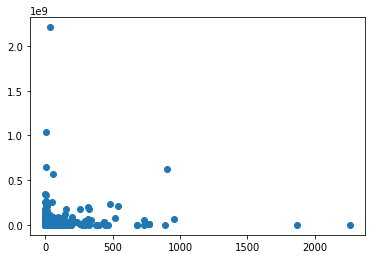

In [39]:
plt.scatter(x='TOTAL UNITS', y='SALE PRICE', data=data)
pass

Мы видим, что основная масса точек сгрудилась в левом нижнем углу. Какие-то точки соответствуют объектам недвижимости с чрезмерно большими значениями признака TOTAL UNITS или SALE PRICE. Например, 

Это выбросы (outliers) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

In [40]:
data['TOTAL UNITS'].max()

2261

In [41]:
data['SALE PRICE'].max()

2210000000.0

Объекты, значения признаков которых сильно отличаются от значений признаков основной массы объектов, сильно выпадающие из общей картины - это выбросы (outliers). Возможно, это ошибки в данных. Выбросы, как правило, мешают построить хорошее решающее правило. Избавимся от них.

In [42]:
data['SALE PRICE'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.000000e+00
0.010    0.000000e+00
0.050    0.000000e+00
0.100    0.000000e+00
0.500    5.300000e+05
0.900    1.950000e+06
0.950    3.500000e+06
0.990    1.245000e+07
0.995    2.030932e+07
Name: SALE PRICE, dtype: float64

In [43]:
data['TOTAL UNITS'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     1.0
0.900     3.0
0.950     4.0
0.990    21.0
0.995    42.0
Name: TOTAL UNITS, dtype: float64

In [44]:
rows_to_drop = data[
    (data['SALE PRICE'] < data['SALE PRICE'].quantile(0.005)) | (data['SALE PRICE'] > data['SALE PRICE'].quantile(0.995)) | 
    (data['TOTAL UNITS']  < data['TOTAL UNITS' ].quantile(0.005)) | (data['TOTAL UNITS']  > data['TOTAL UNITS' ].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(83853, 21)

Прежний размер таблицы - (84548, 21). Т.е. мы избавились от 695 выбросов.  
Теперь максимальные значения прзнаков такие:

In [45]:
data['TOTAL UNITS'].max()

42

In [46]:
data['SALE PRICE'].max()

20302500.0

In [47]:
rows_to_drop

Int64Index([    7,    73,    75,   200,   227,   235,   236,   237,   238,
              497,
            ...
            75870, 75871, 76696, 76697, 76700, 77324, 79364, 81334, 81335,
            81562],
           dtype='int64', length=695)

# 3. Визуализация и описательная статистика

Визуализация и описательная статистика - важные этапы анализа данных. Сводную информацию о признаках можем получить, вызвав метод describe:

In [48]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,83853.000000,83853.000000,83853.000000,83853.000000,83853.000000,83853.000000,83853.000000,5.769200e+04,5.635500e+04,83853.000000,83853.000000,6.940600e+04
mean,3.006726,4253.980466,377.541006,10734.132410,1.384220,0.101618,1.516308,3.316097e+03,2.775087e+03,1788.742991,1.650400,9.247256e+05
std,1.287548,3571.874128,659.545003,1293.452049,2.521844,0.708447,2.653468,2.383165e+04,1.677586e+04,538.235969,0.814926,1.633198e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1328.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.634750e+03,1.036000e+03,1920.000000,1.000000,2.250000e+05
50%,3.000000,3330.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.300000e+03,1.669000e+03,1940.000000,2.000000,5.270000e+05
75%,4.000000,6315.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.408000e+03,2.520000e+03,1965.000000,2.000000,9.400000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,42.000000,42.000000,42.000000,3.014056e+06,1.501878e+06,2017.000000,4.000000,2.030250e+07


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках. Получил информацию о категориальных:

In [49]:
data.describe(include=['category'])

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,BUILDING CLASS AT TIME OF SALE,SALE DATE
count,83853,83853,83853,83853,83853,83853,83853,83853,83853
unique,254,47,11,1,160,67021,3947,159,364
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,,D4,131-05 40TH ROAD,,R4,2017-06-29 00:00:00
freq,3050,18229,38624,83853,12612,210,64931,12927,526


### Построим все возможные диаграммы рассеивания для каждой пары переменных:

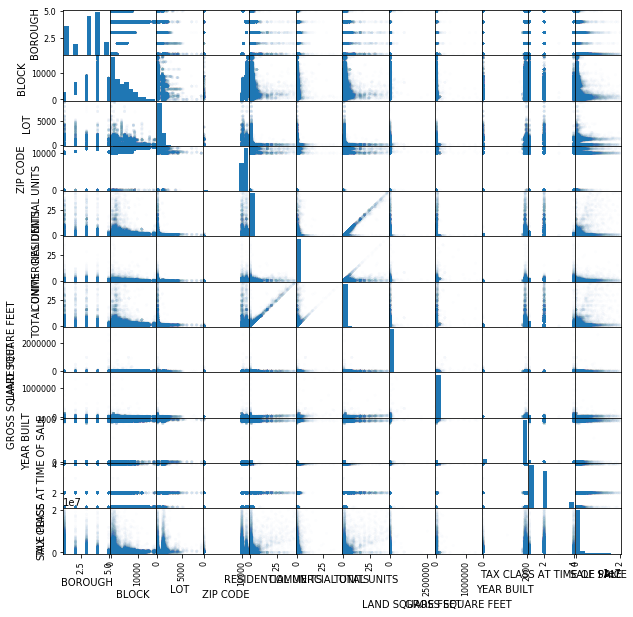

In [50]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

C:\Users\sasha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sasha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\sasha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sasha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


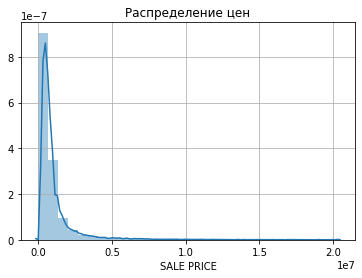

In [51]:
sns.distplot(data['SALE PRICE'], bins=30)
plt.grid()
plt.title('Распределение цен')
pass

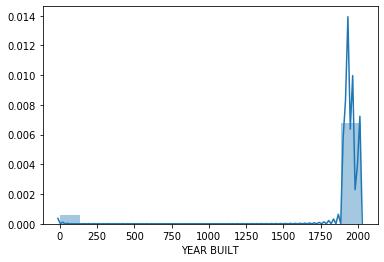

In [52]:
sns.distplot(data['YEAR BUILT'], bins = 15)
pass

### Ящик с усами

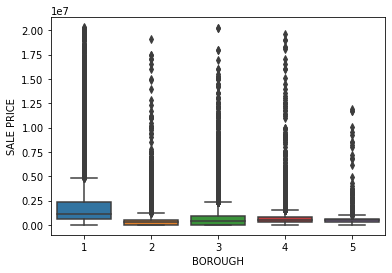

In [53]:
sns.boxplot(x="BOROUGH", y="SALE PRICE", data=data)
pass

### Скрипичный график

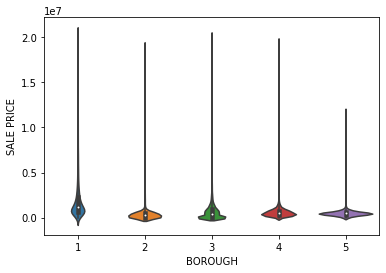

In [54]:
sns.violinplot(x="BOROUGH", y="SALE PRICE", data=data)
pass

### Корреляционная матрица

In [55]:
corr_mat = data.corr()
corr_mat

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,1.000000,0.415008,-0.280309,0.254475,-0.004109,-0.030572,-0.014578,0.040627,-0.080432,0.110165,-0.313527,-0.292622
BLOCK,0.415008,1.000000,-0.230791,0.233138,-0.015547,-0.026450,-0.025429,0.005943,-0.049407,0.071914,-0.284728,-0.240668
LOT,-0.280309,-0.230791,1.000000,-0.146163,-0.117791,-0.069241,-0.115470,-0.036080,-0.025767,-0.290244,0.302872,0.140299
ZIP CODE,0.254475,0.233138,-0.146163,1.000000,0.066686,0.008928,0.066961,-0.050795,-0.020535,0.331402,-0.142236,-0.139259
RESIDENTIAL UNITS,-0.004109,-0.015547,-0.117791,0.066686,1.000000,0.069135,0.962167,-0.001446,0.109486,0.095547,-0.130872,0.189651
COMMERCIAL UNITS,-0.030572,-0.026450,-0.069241,0.008928,0.069135,1.000000,0.329937,0.075802,0.280703,0.037446,0.261595,0.150934
TOTAL UNITS,-0.014578,-0.025429,-0.115470,0.066961,0.962167,0.329937,1.000000,0.018892,0.181208,0.095416,-0.021224,0.214588
LAND SQUARE FEET,0.040627,0.005943,-0.036080,-0.050795,-0.001446,0.075802,0.018892,1.000000,0.300632,-0.020929,0.071441,0.067542
GROSS SQUARE FEET,-0.080432,-0.049407,-0.025767,-0.020535,0.109486,0.280703,0.181208,0.300632,1.000000,0.037401,0.144596,0.108237
YEAR BUILT,0.110165,0.071914,-0.290244,0.331402,0.095547,0.037446,0.095416,-0.020929,0.037401,1.000000,-0.189440,-0.020218


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

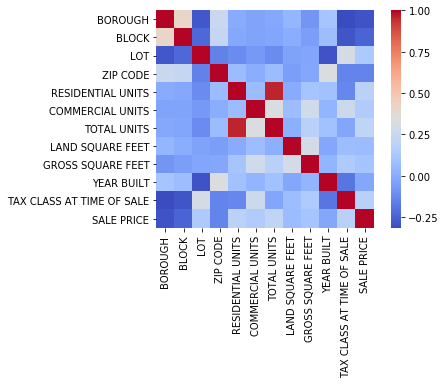

In [56]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [57]:
corr_mat > 0.5

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,True,False,False,False,False,False,False,False,False,False,False,False
BLOCK,False,True,False,False,False,False,False,False,False,False,False,False
LOT,False,False,True,False,False,False,False,False,False,False,False,False
ZIP CODE,False,False,False,True,False,False,False,False,False,False,False,False
RESIDENTIAL UNITS,False,False,False,False,True,False,True,False,False,False,False,False
COMMERCIAL UNITS,False,False,False,False,False,True,False,False,False,False,False,False
TOTAL UNITS,False,False,False,False,True,False,True,False,False,False,False,False
LAND SQUARE FEET,False,False,False,False,False,False,False,True,False,False,False,False
GROSS SQUARE FEET,False,False,False,False,False,False,False,False,True,False,False,False
YEAR BUILT,False,False,False,False,False,False,False,False,False,True,False,False


In [58]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

RESIDENTIAL UNITS  TOTAL UNITS    0.962167
dtype: float64

Коэффициент корреляции RESIDENTIAL UNITS и TOTAL UNITS близок к 1, т.е. между этими признаками наблюдается положительная корреляция
Напомним, что
- RESIDENTIAL UNITS - жилых единиц в объекте недвижимости
- TOTAL UNITS - всего единиц в объекте недвижимости
- COMMERCIAL UNITS - коммерческих единиц в объекте недвижимости

*TOTAL UNITS = RESIDENTIAL UNITS + COMMERCIAL UNITS*

Наблюдается высокая степень связи между RESIDENTIAL UNITS и TOTAL UNITS. Вклад RESIDENTIAL UNITS в TOTAL UNITS велик, а вклад COMMERCIAL UNITS в TOTAL UNITS - мал.

Коэффициент корреляции между 'ZIP CODE' и 'COMMERCIAL UNITS', а также между 'LAND SQUARE FEET' и 'BLOCK' практически равен нулю, что вполне объяснимо

In [59]:
corr_mat.loc['ZIP CODE', 'COMMERCIAL UNITS'],corr_mat.loc['LAND SQUARE FEET', 'BLOCK']

(0.008928216093371794, 0.005942589569073014)

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

### Диаграмма зависимости количества проданных объектов от района

In [60]:
data['BOROUGH'].value_counts()

4    26626
3    23915
1    17956
5     8402
2     6954
Name: BOROUGH, dtype: int64

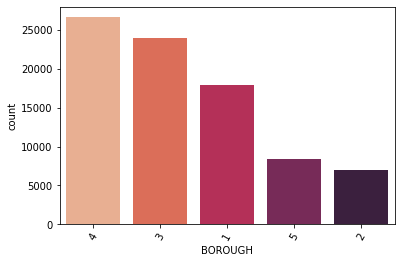

In [61]:
sns.countplot(x='BOROUGH', order=data['BOROUGH'].value_counts().index,  data=data, palette = 'rocket_r')
plt.xticks(rotation = 60)
pass

### Диаграмма зависимости количества проданных объектов от года их постройки 

In [62]:
data['YEAR BUILT'].value_counts()

0       6938
1920    6012
1930    5015
1925    4296
1910    3556
1950    3141
1960    2645
1940    2445
1931    2237
1955    1957
1899    1797
1901    1754
1935    1610
1965    1508
2015    1454
1945    1330
2014    1217
1915    1170
2007    1165
1900    1107
2005    1099
1970     952
1963     934
2008     930
2006     924
1962     831
2016     782
2013     727
1961     724
2004     712
        ... 
1894       5
1845       4
1892       4
2017       4
1891       3
1875       3
1854       3
1898       3
1871       3
1852       3
1844       2
1840       2
1856       2
1882       2
1883       2
1864       2
1865       2
1846       2
1847       2
1835       2
1851       2
1893       2
1889       2
1829       1
1826       1
1680       1
1849       1
1111       1
1832       1
1855       1
Name: YEAR BUILT, Length: 157, dtype: int64

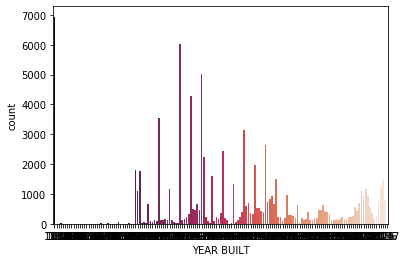

In [63]:
sns.countplot(x='YEAR BUILT', data=data, palette ='rocket')
pass

### Диаграмма зависимости количества проданных объектов от налогового класса

In [64]:
data['TAX CLASS AT TIME OF SALE'].value_counts()

1    41523
2    36224
4     6102
3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

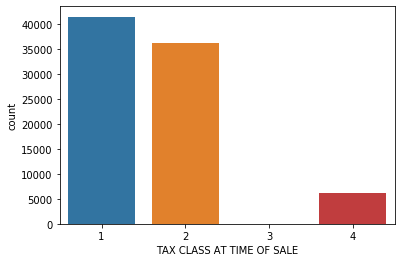

In [65]:
sns.countplot(x='TAX CLASS AT TIME OF SALE', data=data)
pass

### Зависимость между налоговым классом и районом

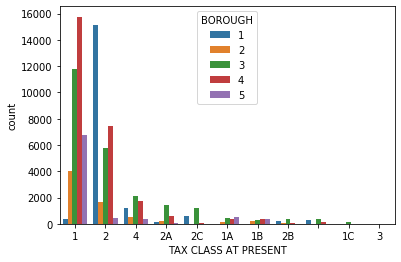

In [66]:
sns.countplot(x='TAX CLASS AT PRESENT', order=data['TAX CLASS AT PRESENT'].value_counts().index, hue='BOROUGH', data=data)
#pass

# 4. Заполнение пропущенных значений

In [67]:
data.dtypes

BOROUGH                              int64
NEIGHBORHOOD                      category
BUILDING CLASS CATEGORY           category
TAX CLASS AT PRESENT              category
BLOCK                                int64
LOT                                  int64
EASE-MENT                         category
BUILDING CLASS AT PRESENT         category
ADDRESS                           category
APARTMENT NUMBER                  category
ZIP CODE                             int64
RESIDENTIAL UNITS                    int64
COMMERCIAL UNITS                     int64
TOTAL UNITS                          int64
LAND SQUARE FEET                   float64
GROSS SQUARE FEET                  float64
YEAR BUILT                           int64
TAX CLASS AT TIME OF SALE            int64
BUILDING CLASS AT TIME OF SALE    category
SALE PRICE                         float64
SALE DATE                         category
dtype: object

Считаем, что сейчас для int64 и float64 пропуски выражаются только через NaN, а для категориальных признаков только через    ' '.
(Был проведён поочерёдный вызов поиска ' ' для каждого признака. ' ' в int64 и float64 столбцах не обнаружено. NaN в категориальных столбцах также сейчас отсутствуют)

Заменим для категориальных признаков ' ' на NaN.

In [68]:
if (data['NEIGHBORHOOD'] == ' ').sum() != 0:
    data.loc[data['NEIGHBORHOOD'] == ' ', 'NEIGHBORHOOD'] = None

In [69]:
if (data['BUILDING CLASS CATEGORY'] == ' ').sum() != 0:
    data.loc[data['BUILDING CLASS CATEGORY'] == ' ', 'BUILDING CLASS CATEGORY'] = None

In [70]:
if (data['TAX CLASS AT PRESENT'] == ' ').sum() != 0:
    data.loc[data['TAX CLASS AT PRESENT'] == ' ', 'TAX CLASS AT PRESENT'] = None

In [71]:
if (data['EASE-MENT'] == ' ').sum() != 0:
    data.loc[data['EASE-MENT'] == ' ', 'EASE-MENT'] = None

In [72]:
if (data['BUILDING CLASS AT PRESENT'] == ' ').sum() != 0:
    data.loc[data['BUILDING CLASS AT PRESENT'] == ' ', 'BUILDING CLASS AT PRESENT'] = None

In [73]:
if (data['ADDRESS'] == ' ').sum() != 0:
    data.loc[data['ADDRESS'] == ' ', 'ADDRESS'] = None

In [74]:
if (data['APARTMENT NUMBER'] == ' ').sum() != 0:
    data.loc[data['APARTMENT NUMBER'] == ' ', 'APARTMENT NUMBER'] = None

In [75]:
if (data['BUILDING CLASS AT TIME OF SALE'] == ' ').sum() != 0:
    data.loc[data['BUILDING CLASS AT TIME OF SALE'] == ' ', 'BUILDING CLASS AT TIME OF SALE'] = None

In [76]:
if (data['SALE DATE'] == ' ').sum() != 0:
    data.loc[data['SALE DATE'] == ' ', 'SALE DATE'] = None

Количество пропусков в каждом столбце:

In [77]:
data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                737
BLOCK                                 0
LOT                                   0
EASE-MENT                         83853
BUILDING CLASS AT PRESENT           737
ADDRESS                               0
APARTMENT NUMBER                  64931
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26161
GROSS SQUARE FEET                 27498
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14447
SALE DATE                             0
dtype: int64

Удалим столбцы EASE-MENT и APARTMENT NUMBER с пропущенными значениями: EASE-MENT целиком состоит только из пропущенных значений, а APARTMENT NUMBER на 77%.

In [78]:
data=data.drop(data.columns[[6, 9]], axis='columns')

In [79]:
data.shape  # была 21 колонка - стало 19

(83853, 19)

Пропущенные значения в столбцах LAND SQUARE FEET, GROSS SQUARE FEET и SALE PRICE, соответствующих числовым признакам, заполним медианами:

In [80]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [81]:
data.isna().sum()

BOROUGH                             0
NEIGHBORHOOD                        0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT              737
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT         737
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

Строки, в которых пропущены значения в столбце TAX CLASS AT PRESENT или BUILDING CLASS AT PRESENT (категориальные признаки) удалим. Количество данных при этом изменится мало.

In [82]:
data = data.dropna(subset=['TAX CLASS AT PRESENT']) # Drop only if NaN in specific column (as asked in the question)
data = data.dropna(subset=['BUILDING CLASS AT PRESENT'])

In [83]:
data.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [84]:
data.shape 

(83116, 19)

После выполнения последнего шага избавления от пропущенных значений, строк стало 83116, ровно на 737 меньше, чем было. 
Т.е. признаки TAX CLASS AT PRESENT и BUILDING CLASS AT PRESENT отсутствовали только одновременно - в 737 строках

Также видно, что в целом пропущенных значений не осталось

In [85]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000,8.311600e+04,8.311600e+04,83116.000000,83116.000000,8.311600e+04
mean,3.012031,4262.815150,369.741891,10786.951874,1.396494,0.102519,1.529754,3.015028e+03,2.426027e+03,1804.533580,1.644365,8.479445e+05
std,1.287565,3575.542132,656.270524,1054.180140,2.529614,0.711516,2.661345,1.985954e+04,1.382247e+04,513.576051,0.812321,1.479834e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1330.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.348000e+03,1920.000000,1.000000,2.950000e+05
50%,3.000000,3341.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.300000e+03,1.669000e+03,1940.000000,2.000000,5.270000e+05
75%,4.000000,6318.250000,534.250000,11357.000000,2.000000,0.000000,2.000000,2.640000e+03,2.076000e+03,1966.000000,2.000000,8.150000e+05
max,5.000000,16322.000000,9106.000000,11694.000000,42.000000,42.000000,42.000000,3.014056e+06,1.501878e+06,2017.000000,4.000000,2.030250e+07


In [86]:
data.describe(include=['category'])

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,SALE DATE
count,83116,83116,83116,83116,83116,83116,83116
unique,254,47,10,159,66933,159,364
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,D4,131-05 40TH ROAD,D4,2016-12-22 00:00:00
freq,3011,18228,38624,12612,210,12612,518


# 5. Векторизация

Но сначала удалим столбецы 'Adress' и 'SALE DATE'. Они имеют 66933 и 364 уникальных значений соответсвенно, подвергая их векторизации, наша таблица принимает размеры (83116, 68585) и очень затрудняет вычисления.  
На анализ это не должно повлиять, т.к. 'Adress', в отличие от 'BOROUGH' и 'NEIGHBORHOOD' не даёт почти никакой информации. Удаление 'SALE DATE' также не критично.

In [87]:
data.drop(['ADDRESS'], axis='columns', inplace=True)
data.drop(['SALE DATE'], axis='columns', inplace=True)

Проведем векторизацию категориальных (номинальных) признаков. Признак BOROUGH - категориальный, представленный в виде чисел. Не будем пока включать его ни в categorical_columns, ни в numerical_columns

In [89]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
numerical_columns= ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'SALE PRICE']


In [90]:
data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= []
nonbinary_columns= ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']


Бинарных категориальных признаков нет. Будем отличать только numerical_columns и categorical_columns

К категориальным признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Например, в нашей задаче признак TAX CLASS AT PRESENT принимает 10 различных значений:

In [91]:
data['TAX CLASS AT PRESENT'].unique()

[2A, 2, 2B, 2C, 4, 1, 1C, 3, 1A, 1B]
Categories (10, object): [2A, 2, 2B, 2C, ..., 1C, 3, 1A, 1B]

Заменим признак TAX CLASS AT PRESENT 10 признаков: TAX CLASS AT PRESENT_2A, TAX CLASS AT PRESENT_2, ..., TAX CLASS AT PRESENT_1B.

- Если признак TAX CLASS AT PRESENT принимает значение 2A, то признакTAX CLASS AT PRESENT_2A равен 1, а все остальные равны 0.
- Если признак TAX CLASS AT PRESENT принимает значение 2, то признак TAX CLASS AT PRESENT_2 равен 1, а все остальные равны 0.
и т.д.

Такую векторизацию осуществляет в pandas метод get_dummies.

In [92]:
data[categorical_columns]

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,C2
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,C7
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,C7
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,C4
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,C2
5,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C4,C4
6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,C4
8,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D5,D5
9,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D9,D9
10,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D7,D7


In [93]:
data_categorical = pd.get_dummies(data[nonbinary_columns])
print(data_categorical.columns)

Index(['NEIGHBORHOOD_AIRPORT LA GUARDIA', 'NEIGHBORHOOD_ALPHABET CITY',
       'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_ARDEN HEIGHTS',
       'NEIGHBORHOOD_ARROCHAR', 'NEIGHBORHOOD_ARROCHAR-SHORE ACRES',
       'NEIGHBORHOOD_ARVERNE', 'NEIGHBORHOOD_ASTORIA',
       'NEIGHBORHOOD_BATH BEACH', 'NEIGHBORHOOD_BATHGATE',
       ...
       'BUILDING CLASS AT TIME OF SALE_W6',
       'BUILDING CLASS AT TIME OF SALE_W8',
       'BUILDING CLASS AT TIME OF SALE_W9',
       'BUILDING CLASS AT TIME OF SALE_Y1',
       'BUILDING CLASS AT TIME OF SALE_Y3',
       'BUILDING CLASS AT TIME OF SALE_Z0',
       'BUILDING CLASS AT TIME OF SALE_Z2',
       'BUILDING CLASS AT TIME OF SALE_Z3',
       'BUILDING CLASS AT TIME OF SALE_Z7',
       'BUILDING CLASS AT TIME OF SALE_Z9'],
      dtype='object', length=645)


In [94]:
len(data_categorical.columns)

645

# 6. Нормализация

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

Не будем нормализовать целевой признак BOROUGH

In [95]:
numerical_columns_exept_BOROUGH = ['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'SALE PRICE']

In [96]:
data_numerical_exept_BOROUGH = data[numerical_columns_exept_BOROUGH]
data_numerical_exept_BOROUGH.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000,8.311600e+04,8.311600e+04,83116.000000,83116.000000,8.311600e+04
mean,4262.815150,369.741891,10786.951874,1.396494,0.102519,1.529754,3.015028e+03,2.426027e+03,1804.533580,1.644365,8.479445e+05
std,3575.542132,656.270524,1054.180140,2.529614,0.711516,2.661345,1.985954e+04,1.382247e+04,513.576051,0.812321,1.479834e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,1330.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.348000e+03,1920.000000,1.000000,2.950000e+05
50%,3341.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.300000e+03,1.669000e+03,1940.000000,2.000000,5.270000e+05
75%,6318.250000,534.250000,11357.000000,2.000000,0.000000,2.000000,2.640000e+03,2.076000e+03,1966.000000,2.000000,8.150000e+05
max,16322.000000,9106.000000,11694.000000,42.000000,42.000000,42.000000,3.014056e+06,1.501878e+06,2017.000000,4.000000,2.030250e+07


In [97]:
data_numerical_exept_BOROUGH = (data_numerical_exept_BOROUGH - data_numerical_exept_BOROUGH.mean(axis = 0))/data_numerical_exept_BOROUGH.std(axis = 0)

In [98]:
data_numerical_exept_BOROUGH.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04
mean,2.875012e-15,6.405938e-15,-6.377818e-15,-9.209038e-15,3.864424e-14,-2.743032e-14,-1.317010e-14,1.194994e-14,-8.437079e-16,1.547329e-13,-2.587457e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.191935e+00,-5.618748e-01,-1.023255e+01,-5.520581e-01,-1.440857e-01,-5.748047e-01,-1.518176e-01,-1.755133e-01,-3.513664e+00,-7.932383e-01,-5.729999e-01
25%,-8.202435e-01,-5.298758e-01,-4.571817e-01,-5.520581e-01,-1.440857e-01,-1.990548e-01,-5.111035e-02,-7.799089e-02,2.248283e-01,-7.932383e-01,-3.736532e-01
50%,-2.578113e-01,-4.872105e-01,4.003567e-01,-1.567409e-01,-1.440857e-01,-1.990548e-01,-3.600426e-02,-5.476783e-02,2.637709e-01,4.378015e-01,-2.168788e-01
75%,5.748596e-01,2.506712e-01,5.407502e-01,2.385763e-01,-1.440857e-01,1.766950e-01,-1.888402e-02,-2.532302e-02,3.143963e-01,4.378015e-01,-2.226233e-02
max,3.372687e+00,1.331198e+01,8.604299e-01,1.605126e+01,5.888477e+01,1.520669e+01,1.516169e+02,1.084793e+02,4.137000e-01,2.899881e+00,1.314645e+01


# Соединяем все в одну таблицу

In [99]:
data = pd.concat((data['BOROUGH'], data_numerical_exept_BOROUGH, data_categorical), axis = 1)
print(data.shape)

(83116, 657)


In [100]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,...,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y1,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z7,BUILDING CLASS AT TIME OF SALE_Z9
count,83116.000000,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,8.311600e+04,...,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000,83116.000000
mean,3.012031,2.875012e-15,6.405938e-15,-6.377818e-15,-9.209038e-15,3.864424e-14,-2.743032e-14,-1.317010e-14,1.194994e-14,-8.437079e-16,...,0.000024,0.000072,0.000277,0.000012,0.000012,0.000193,0.000048,0.000024,0.000012,0.001781
std,1.287565,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.004905,0.008496,0.016633,0.003469,0.003469,0.013873,0.006937,0.004905,0.003469,0.042160
min,1.000000,-1.191935e+00,-5.618748e-01,-1.023255e+01,-5.520581e-01,-1.440857e-01,-5.748047e-01,-1.518176e-01,-1.755133e-01,-3.513664e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-8.202435e-01,-5.298758e-01,-4.571817e-01,-5.520581e-01,-1.440857e-01,-1.990548e-01,-5.111035e-02,-7.799089e-02,2.248283e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,-2.578113e-01,-4.872105e-01,4.003567e-01,-1.567409e-01,-1.440857e-01,-1.990548e-01,-3.600426e-02,-5.476783e-02,2.637709e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.748596e-01,2.506712e-01,5.407502e-01,2.385763e-01,-1.440857e-01,1.766950e-01,-1.888402e-02,-2.532302e-02,3.143963e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.372687e+00,1.331198e+01,8.604299e-01,1.605126e+01,5.888477e+01,1.520669e+01,1.516169e+02,1.084793e+02,4.137000e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y Отбор признаков

Для классификации недвижимости по территориальному признаку обозначенному как "BOROUGH", будем использовать все входные признаки.

In [101]:
# X - вся таблица без столбца BOROUGH
# y - только столбец BOROUGH
X = data.drop('BOROUGH', axis = 1) # выбрасываем столбец 'BOROUGH'
y = data['BOROUGH']
feature_names = X.columns

In [102]:
type(feature_names)

pandas.core.indexes.base.Index

In [103]:
feature_names
# д.б. все колонки, кроме BOROUGH

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE',
       ...
       'BUILDING CLASS AT TIME OF SALE_W6',
       'BUILDING CLASS AT TIME OF SALE_W8',
       'BUILDING CLASS AT TIME OF SALE_W9',
       'BUILDING CLASS AT TIME OF SALE_Y1',
       'BUILDING CLASS AT TIME OF SALE_Y3',
       'BUILDING CLASS AT TIME OF SALE_Z0',
       'BUILDING CLASS AT TIME OF SALE_Z2',
       'BUILDING CLASS AT TIME OF SALE_Z3',
       'BUILDING CLASS AT TIME OF SALE_Z7',
       'BUILDING CLASS AT TIME OF SALE_Z9'],
      dtype='object', length=656)

In [104]:
X = X.to_numpy()

In [105]:
y = y.to_numpy()

In [106]:
print(X.shape)
print(y.shape)
N, d = X.shape

(83116, 656)
(83116,)


In [107]:
type(X)

numpy.ndarray

In [108]:
type(y)

numpy.ndarray

## Разбиваем на тренировочную и тестовую выборки

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# тестовая выборка - 30% данных
# random_state фиксирует split

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

58181 24935
X_train:  (58181, 656)
X_test:   (24935, 656)
y_train:  (58181,)
y_test:   (24935,)


# kNN

### 10 соседей

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [111]:
# predict - предсказывать значение целевого признака по входным признакам для новых объектов
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

0.02444096870112236 0.0309604972929617


In [112]:
print ('ошибка на тестовой выборке', err_test)
print ('ошибка на обучающей выборке', err_train)

ошибка на тестовой выборке 0.0309604972929617
ошибка на обучающей выборке 0.02444096870112236


In [113]:
# матрица ошибок
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[5186   27   24    4    9]
 [  44 1926   38    9   35]
 [  51   46 6972   81    4]
 [  25    9  252 7706   15]
 [  10   50   32    7 2373]]


На диагонали представлены "большие" значения, соответствующие тому, что метод сделал правильный прогноз.  
Ошибок, напротив, мало.

### 1-7 соседей

In [114]:
for i in range(7,0,-1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)

    y_train_predict = knn.predict(X_train)
    err_train = np.mean(y_train != y_train_predict)
    print(i, err_train)

7 0.01863151200563758
6 0.017703373953696224
5 0.014506453997009333
4 0.013543940461662742
3 0.009728261803681615
2 0.008456368917687905
1 0.0


Точность на обучающей выборке для 1 соседа самая высокая - при вычислении одного ближайшего соседа на той же самой выборке, на которой проходило обучение, классификатор выберет этот же самый элемент, то есть на уникальных данных точность должна составлять 100 % - как в нашем случае.

На тестовой выборке при 10 соседях получили, что ошибка на тестовой выборке = 0.0309604972929617, а
ошибка на обучающей выборке = 0.02444096870112236, что можно считать хорошим результатом.